<a href="https://colab.research.google.com/github/Premi04/Covid-19-Visualization/blob/main/Time_Series_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize']=10,6

In [ ]:
url = ('https://raw.githubusercontent.com/Premi04/Covid-19-Visualization/main/case_time_series1.csv')
case=pd.read_csv(url)
final = case.drop(['Date'],axis=1).iloc[352:,:2]


final['Date_YMD'] = pd.to_datetime(final['Date_YMD'], infer_datetime_format=True)
indexedDataset = final.set_index(['Date_YMD'])
indexedDataset.head()

,Daily Confirmed
Date_YMD,
2021-01-16,15050
2021-01-17,13962
2021-01-18,9987
2021-01-19,13787
2021-01-20,15279


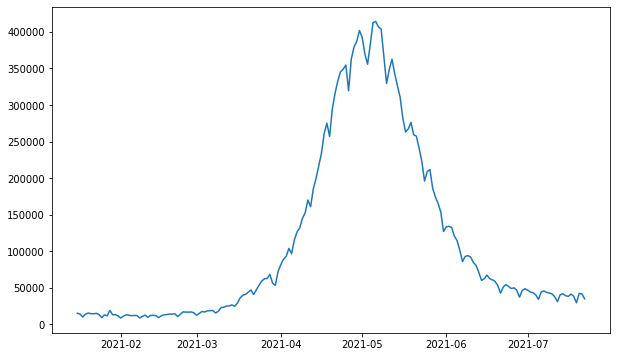

In [ ]:
plt.plot(indexedDataset)

In [ ]:
rolmean = indexedDataset.rolling(window=14).mean()
rolstd = indexedDataset.rolling(window=14).std()
print(rolmean,rolstd)

            Daily Confirmed
Date_YMD                   
2021-01-16              NaN
2021-01-17              NaN
2021-01-18              NaN
2021-01-19              NaN
2021-01-20              NaN
...                     ...
2021-07-18     39906.785714
2021-07-19     39577.785714
2021-07-20     39446.642857
2021-07-21     39159.928571
2021-07-22     38542.714286

[188 rows x 1 columns]             Daily Confirmed
Date_YMD                   
2021-01-16              NaN
2021-01-17              NaN
2021-01-18              NaN
2021-01-19              NaN
2021-01-20              NaN
...                     ...
2021-07-18      3992.460359
2021-07-19      4649.981608
2021-07-20      4541.384194
2021-07-21      4232.343967
2021-07-22      4179.849564

[188 rows x 1 columns]


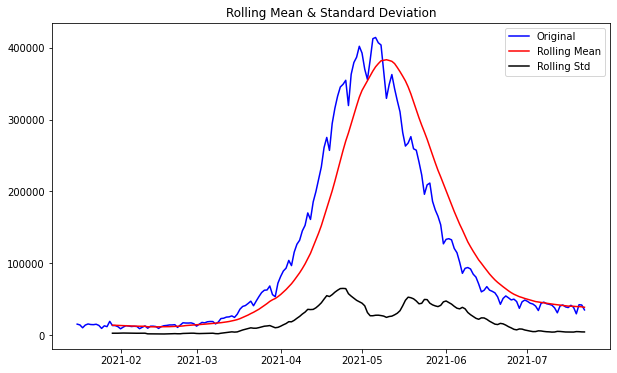

In [ ]:
orig = plt.plot(indexedDataset, color='blue',label='Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
from statsmodels.tsa.stattools import adfuller
print ('Results of Dickey-Fuller test: ')
dftest = adfuller(indexedDataset['Daily Confirmed'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','No. of Observations Used'])
for key, value in dftest[4].items():
  dfoutput['critical value (%s)'%key]=value

print(dfoutput)

Results of Dickey-Fuller test: 
Test Statistic               -2.208880
p-value                       0.203038
#Lags Used                   12.000000
No. of Observations Used    175.000000
critical value (1%)          -3.468280
critical value (5%)          -2.878202
critical value (10%)         -2.575653
dtype: float64


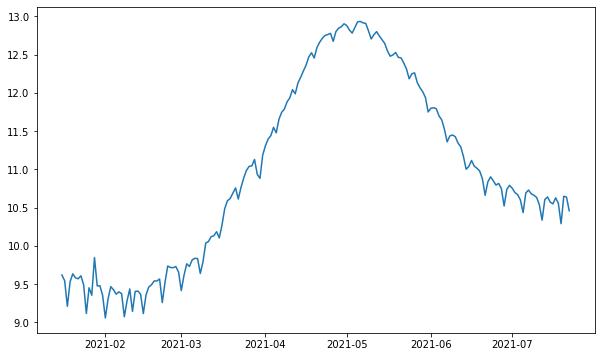

In [ ]:
indexedDataset_logScale = np.log(indexedDataset)
plt.plot(indexedDataset_logScale)

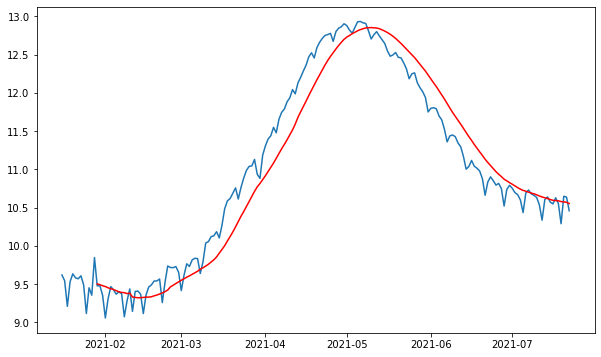

In [ ]:
movingAverage = indexedDataset_logScale.rolling(window=14).mean()
movingSTD=indexedDataset_logScale.rolling(window=14).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color = 'red')

In [ ]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale-movingAverage
datasetLogScaleMinusMovingAverage.head(5)

datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(5)


,Daily Confirmed
Date_YMD,
2021-01-29,-0.025688
2021-01-30,-0.014174
2021-01-31,-0.126342
2021-02-01,-0.410862
2021-02-02,-0.146069


In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
  movingAverage = timeseries.rolling(window=14).mean()
  movingSTD = timeseries.rolling(window=14).std()

  orig=plt.plot(timeseries, color='blue', label='Original')
  mean=plt.plot(movingAverage, color='red', label='Rolling Mean')
  std=plt.plot(movingSTD,color='black',label='Rolling Std')
  plt.legend(loc='best')
  plt.title('Rolling Mean and Standard Deviation')
  plt.show(block=False)

  print('Results of Dickey-Fuller Test: ')
  dftest = adfuller(timeseries['Daily Confirmed'], autolag='AIC')
  dfoutput = pd.Series(dftest[0:4],index = ['Test Statistic', 'p-value', '#Lags Used', 'No. of Observations Used'])
  for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
  print(dfoutput)

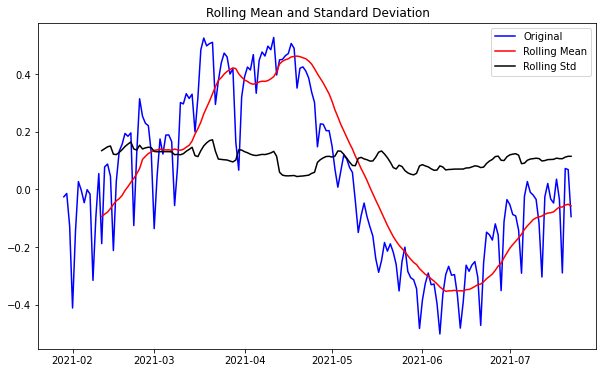

Results of Dickey-Fuller Test: 
Test Statistic               -1.283050
p-value                       0.636891
#Lags Used                   14.000000
No. of Observations Used    160.000000
Critical Value (1%)          -3.471896
Critical Value (5%)          -2.879780
Critical Value (10%)         -2.576495
dtype: float64


In [ ]:
test_stationarity(datasetLogScaleMinusMovingAverage)

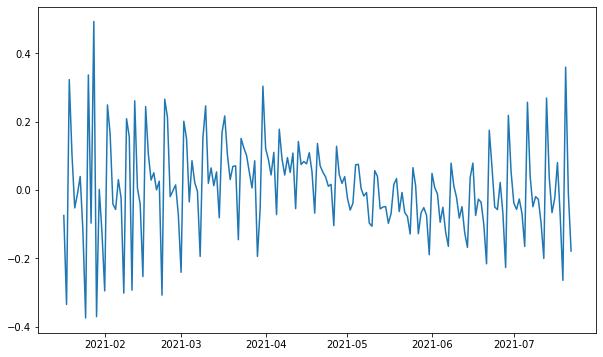

In [ ]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

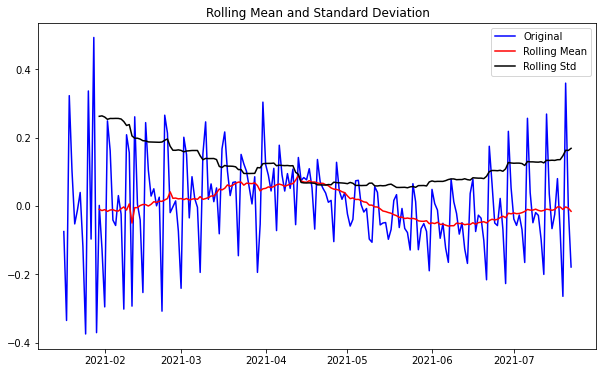

Results of Dickey-Fuller Test: 
Test Statistic               -1.216639
p-value                       0.666397
#Lags Used                   14.000000
No. of Observations Used    172.000000
Critical Value (1%)          -3.468952
Critical Value (5%)          -2.878495
Critical Value (10%)         -2.575809
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

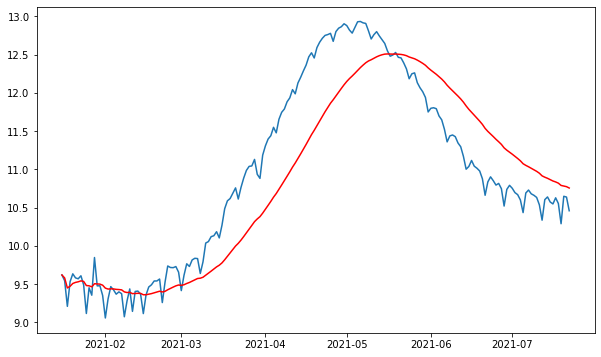

In [ ]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color = 'red')

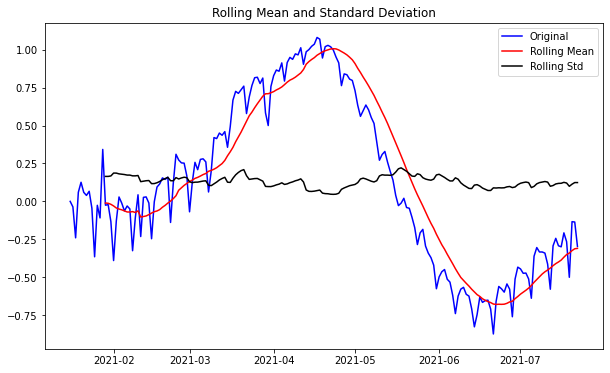

Results of Dickey-Fuller Test: 
Test Statistic               -2.344858
p-value                       0.157908
#Lags Used                   15.000000
No. of Observations Used    172.000000
Critical Value (1%)          -3.468952
Critical Value (5%)          -2.878495
Critical Value (10%)         -2.575809
dtype: float64


In [ ]:
datasetLogScaleMinusMovingExponentialDecayAverage=indexedDataset_logScale-exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

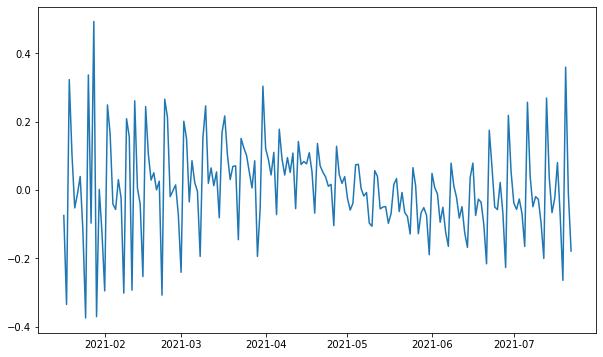

In [ ]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

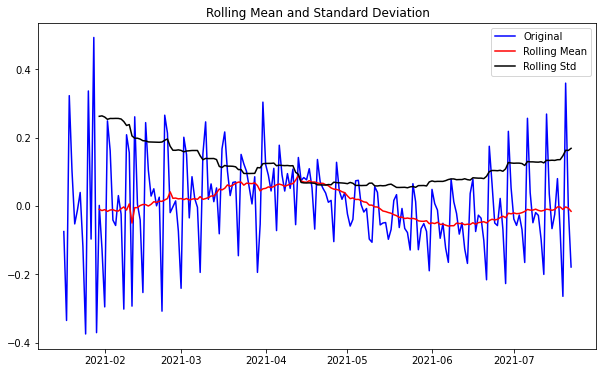

Results of Dickey-Fuller Test: 
Test Statistic               -1.216639
p-value                       0.666397
#Lags Used                   14.000000
No. of Observations Used    172.000000
Critical Value (1%)          -3.468952
Critical Value (5%)          -2.878495
Critical Value (10%)         -2.575809
dtype: float64


In [ ]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

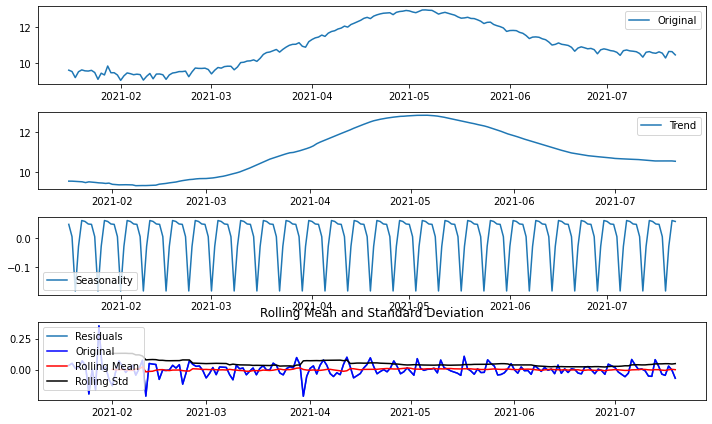

Results of Dickey-Fuller Test: 
Test Statistic               -3.318799
p-value                       0.014059
#Lags Used                   14.000000
No. of Observations Used    167.000000
Critical Value (1%)          -3.470126
Critical Value (5%)          -2.879008
Critical Value (10%)         -2.576083
dtype: float64


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logScale)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logScale, label = 'Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc='best')
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

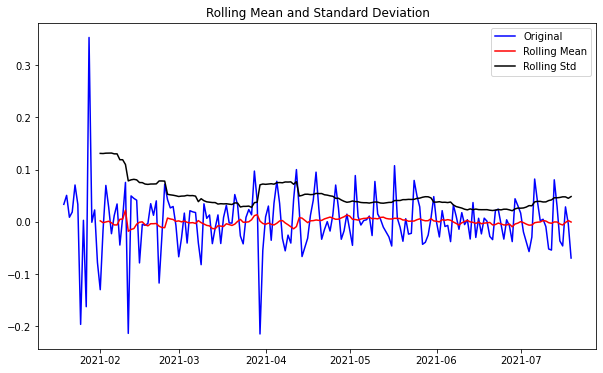

Results of Dickey-Fuller Test: 
Test Statistic               -3.318799
p-value                       0.014059
#Lags Used                   14.000000
No. of Observations Used    167.000000
Critical Value (1%)          -3.470126
Critical Value (5%)          -2.879008
Critical Value (10%)         -2.576083
dtype: float64


In [ ]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


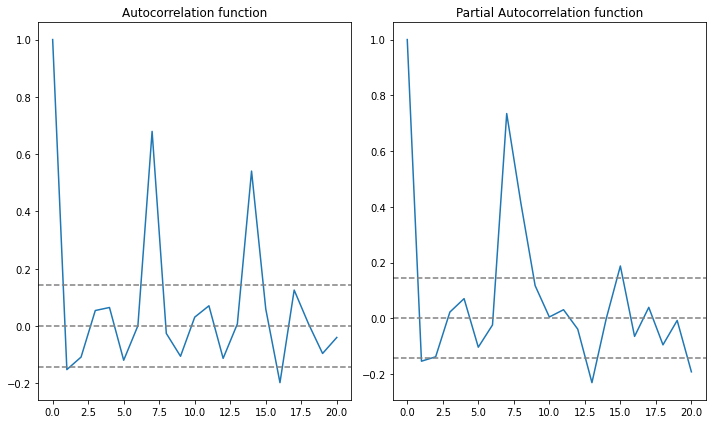

In [ ]:
from statsmodels.tsa.stattools import acf,pacf
lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20,method='ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation function')

plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation function')
plt.tight_layout()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


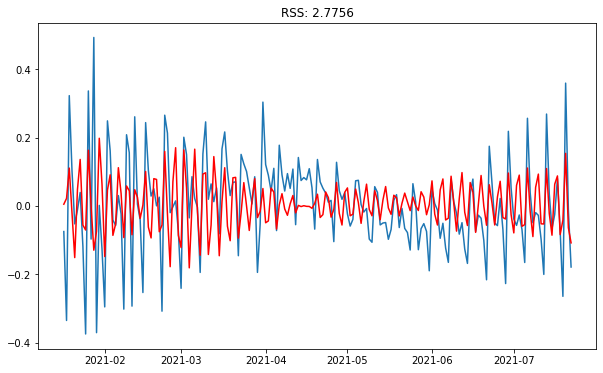

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_AR = model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues-datasetLogDiffShifting['Daily Confirmed'])**2))
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Plotting AR model


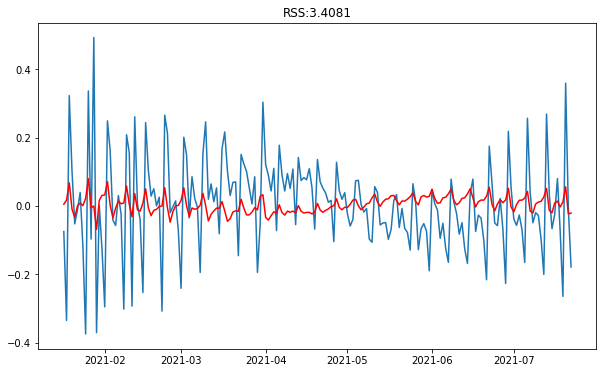

In [ ]:
model = ARIMA(indexedDataset_logScale, order=(0,1,2))
results_MA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum((results_MA.fittedvalues-datasetLogDiffShifting['Daily Confirmed'])**2))
print('Plotting AR model')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


Text(0.5, 1.0, 'RSS:2.7756')

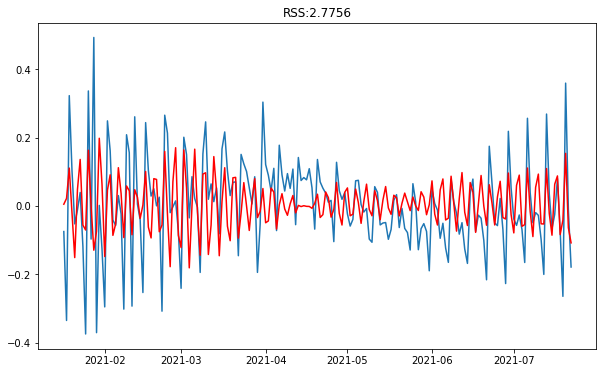

In [ ]:
model = ARIMA(indexedDataset_logScale, order=(2,1,2))
results_ARIMA=model.fit(disp=-1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues,color='red')
plt.title('RSS:%.4f'%sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Daily Confirmed'])**2))

In [ ]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

Date_YMD
2021-01-17    0.004932
2021-01-18    0.021933
2021-01-19    0.110576
2021-01-20   -0.021330
2021-01-21   -0.151181
dtype: float64


In [ ]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date_YMD
2021-01-17    0.004932
2021-01-18    0.026865
2021-01-19    0.137441
2021-01-20    0.116111
2021-01-21   -0.035069
dtype: float64


In [ ]:
predictions_ARIMA_log = pd.Series(indexedDataset_logScale['Daily Confirmed'].iloc[:], index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

Date_YMD
2021-01-16    9.619133
2021-01-17    9.549027
2021-01-18    9.235904
2021-01-19    9.668922
2021-01-20    9.750346
dtype: float64

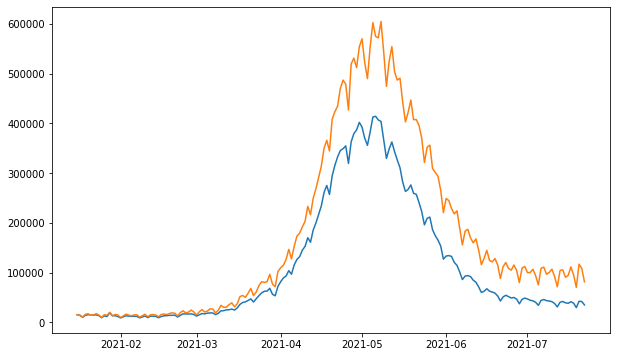

In [ ]:
predictions_ARIMA=np.exp(predictions_ARIMA_log)
plt.plot(indexedDataset)
plt.plot(predictions_ARIMA)

In [ ]:
indexedDataset_logScale

,Daily Confirmed
Date_YMD,
2021-01-16,9.619133
2021-01-17,9.544095
2021-01-18,9.209040
2021-01-19,9.531481
2021-01-20,9.634235
...,...
2021-07-18,10.553988
2021-07-19,10.289430
2021-07-20,10.648468


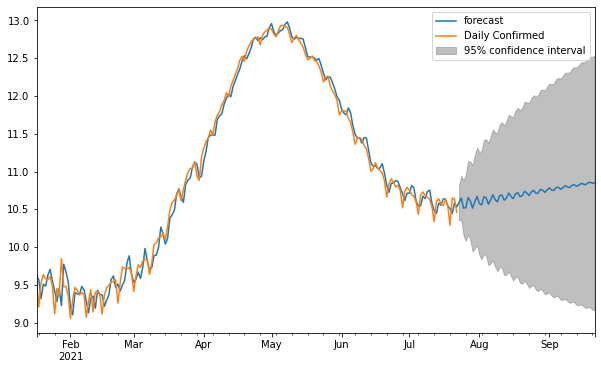

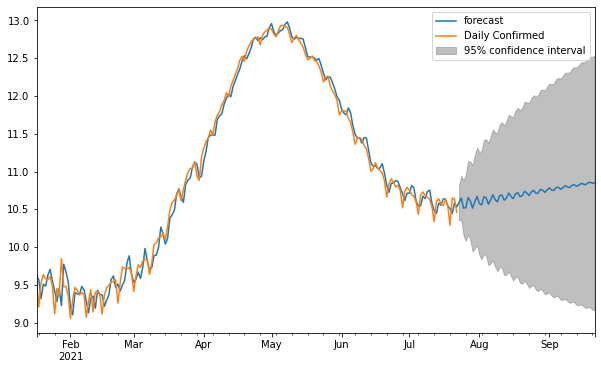

In [ ]:
results_ARIMA.plot_predict(1,248)
#results_ARIMA.forecast(steps=120)